### **Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

First, we should call some variables from data cleaning process.

In [2]:
%store -r df
df = df

%store -r numeric_columns
numeric_columns = numeric_columns

%store -r cat_columns
cat_columns = cat_columns   

### **Descriptive Analysis**

##### **Numerical Data**

Now, let’s analyze the descriptive statistics for quantitative variables. In this section, we will find measurements of central tendency, dispersion, and shape. Then, we will draw the distribution plot to compare it with the normal distribution.

In [3]:
def kde_plot(x):
    plt.figure(figsize = (12,3))

    sns.distplot(df[x[0]], kde_kws={"lw": 5}, hist_kws = {'alpha': 0.25})
    sns.despine(left = True)

    mean = df[x[0]].mean()
    median = df[x[0]].median()

    plt.axvline(mean, color ='black', linestyle ='dashed')
    plt.axvline(median, color ='green', linestyle ='solid')
    plt.xlabel('')
    plt.ylabel('')

    return plt.show()

Now we can see the statistical interpretation for quantitative variables:

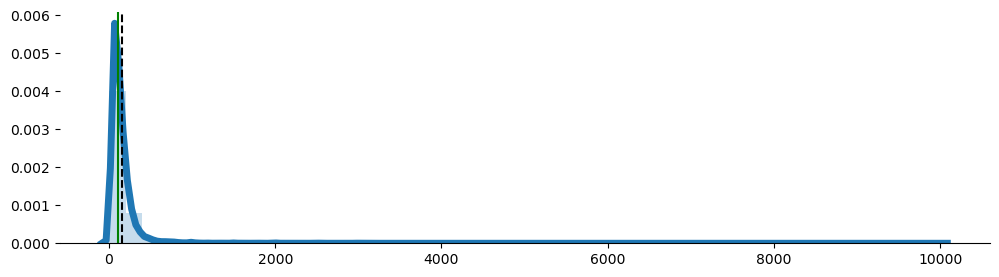

In [ ]:
kde_plot([numeric_columns[0]]) #Price

The result shows we should later handle outlier for price.
<hr>

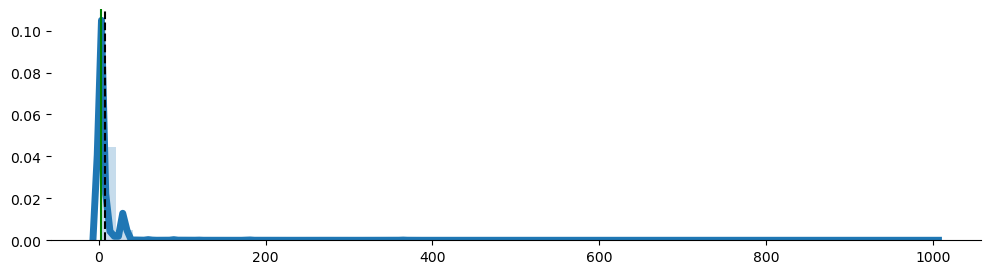

In [ ]:
kde_plot([numeric_columns[1]]) #MinDayNights

Later we should transform this column.
<hr>

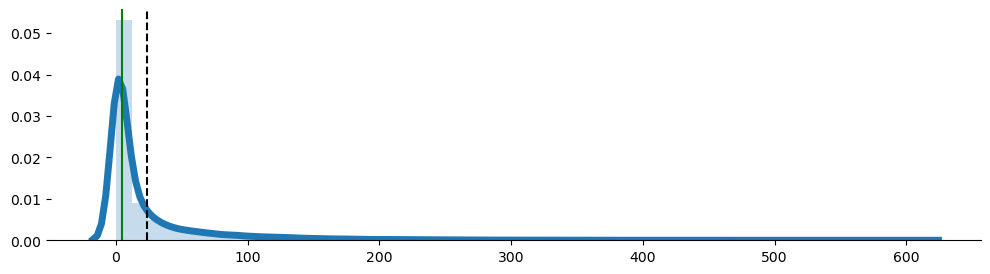

In [ ]:
kde_plot([numeric_columns[2]]) #CountReview

Later, we should transform this feature
<hr>

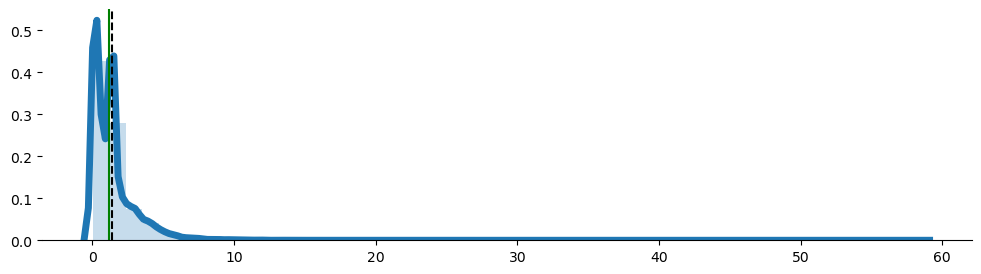

In [ ]:
kde_plot([numeric_columns[3]]) #AvgReview

Later, we should transform this feature
<hr>

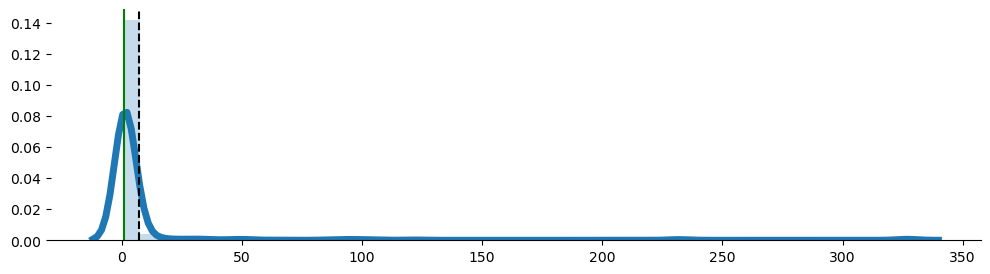

In [ ]:
kde_plot([numeric_columns[4]]) #TotalHostListing

Later, we should transform this feature
<hr>

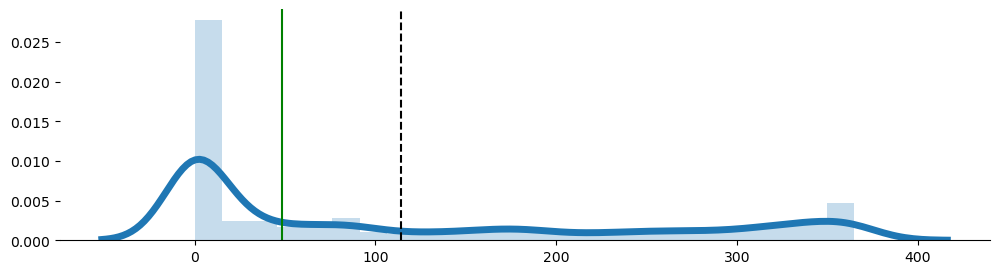

In [ ]:
kde_plot([numeric_columns[5]]) #DayAvailibity

Later, we should transform this feature

##### **Categorical Data**

Here, we can find the mode of categorical columns to see which category repeated more than rest.

In [10]:
print(cat_columns[0], '->' , df[cat_columns[0]].mode()[0])
print(cat_columns[1], '->' , df[cat_columns[1]].mode()[0])
print(cat_columns[2], '->' , df[cat_columns[2]].mode()[0])
print(cat_columns[3], '->' , df[cat_columns[3]].mode()[0])

Location -> Manhattan
Area -> Williamsburg
Type -> Entire home/apt
LastDateReview -> 6/23/2019


### **Correlation Analysis**

In this section, I will explore the relationship between various factors and price. Since price is a crucial aspect for each car, it is important to examine how other variables may be correlated with it. To accomplish this, we will consider two different approaches. The first approach involves analyzing the correlation between numeric variables and price using `Pearson correlation`. The second approach will assess the correlation between categorical variables and price using the `ANOVA test`.

##### **Numerical Data (Pearson)**

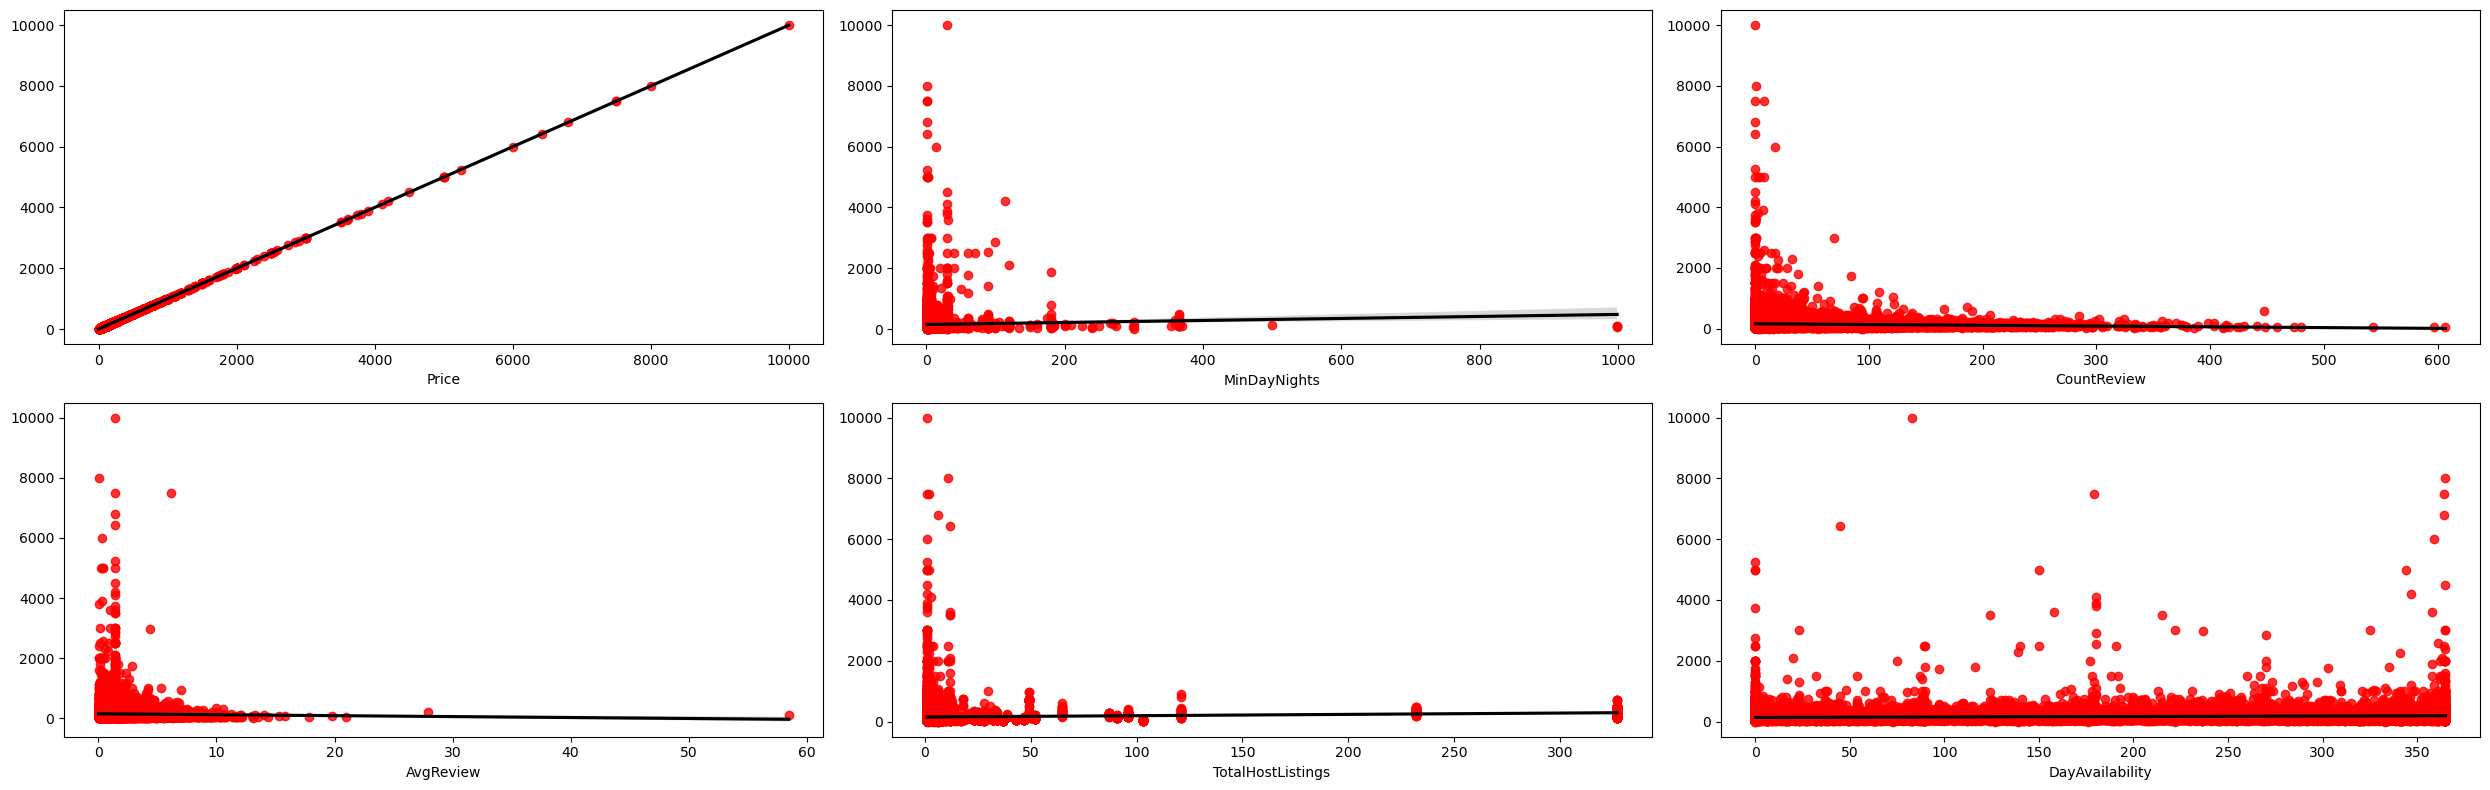

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(25, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    sns.regplot(x=col, 
                y='Price', 
                data=df, 
                ax=axes[i], 
                scatter_kws={"color": "red"}, 
                line_kws={"color":"black"})
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

* in terms of `MinAvrNight`, the plot shows the price of rooms which the average night is less than 50 days, is higher than others.
* in terms of `CountReview`, the plot shows the price of rooms which have review 100 or less, is higher than others.
* in terms of `TotalHostListing`, the plot shows the price of rooms which their host listed fewer number of rooms, is higher than others.

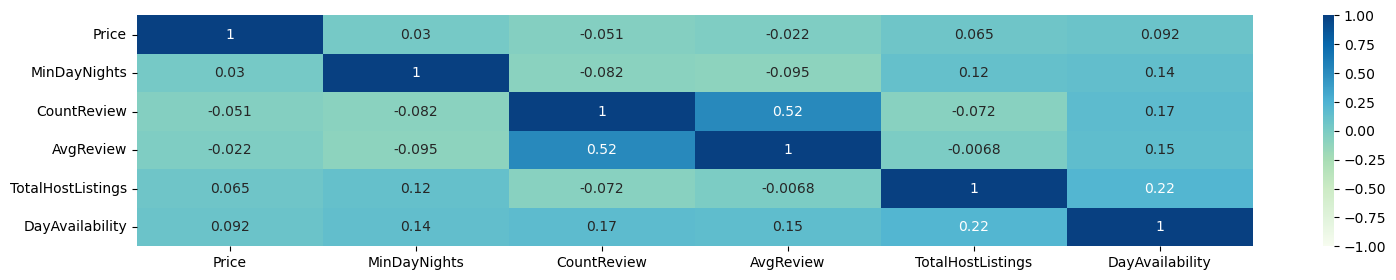

In [12]:
pearson_cor = df[numeric_columns].corr(method = 'pearson')
plt.figure(figsize = (18,3))

sns.heatmap(pearson_cor,
            vmin = -1,
            vmax = 1,
            cmap = "GnBu",
            annot = True)
plt.show()

##### **Categorical Data (ANOVA)**

For categorical variables, the first step is to determine whether a specific categorical variable has an impact on price, meaning we need to assess its significance. To do this, we conduct an ANOVA test to compare the differences between means. After identifying the significant variables, we perform pairwise descriptive analysis for all categories within the relevant categorical variable, allowing us to compare their effects on price.

In [15]:
cat_columns.remove('LastDateReview')

for i in cat_columns:
    formula = 'Price ~ {}'.format(i)
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    p_value = anova.iloc[0,3]

    print('P-value for Price ~ {}: {}'.format(i , p_value))

P-value for Price ~ Location: 1.9885230265474764e-199
P-value for Price ~ Area: 0.0
P-value for Price ~ Type: 0.0


According to results, we can come up that since p-value in less than 0.05, all categorical features are important.

So, in the next step, we want to see for each label in the above categorical variables, which of them has the most impact on price. Thus, I make s function to calculate the mean for each label in every single categorical variable (just the first 5 labels in terms of strength)

In [16]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['Price'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['Price'], inplace=False, ascending=False)

    return mean_by.head(5)

In [18]:
mean_pairwise(cat_columns[0]) #Location

,Price
Location,
Manhattan,196.022560
Staten Island,126.422886
Brooklyn,124.142960
Queens,95.704194
Bronx,88.004967


In [23]:
mean_pairwise(cat_columns[1]) #Area

,Price
Area,
Woodrow,700.000000
Sea Gate,624.200000
Tribeca,417.141414
Battery Park City,403.911765
Randall Manor,397.600000


In [24]:
mean_pairwise(cat_columns[2]) #Type

,Price
Type,
Entire home/apt,210.832649
Private room,88.141288
Shared room,71.106013
